# Simulation de déplacement 1D

In [9]:
# %reset -f

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from IPython.display import Image


Ce notebook simule le déplacement d'un floe 1D dont les deux extrémité (les noeuds) sont libres.

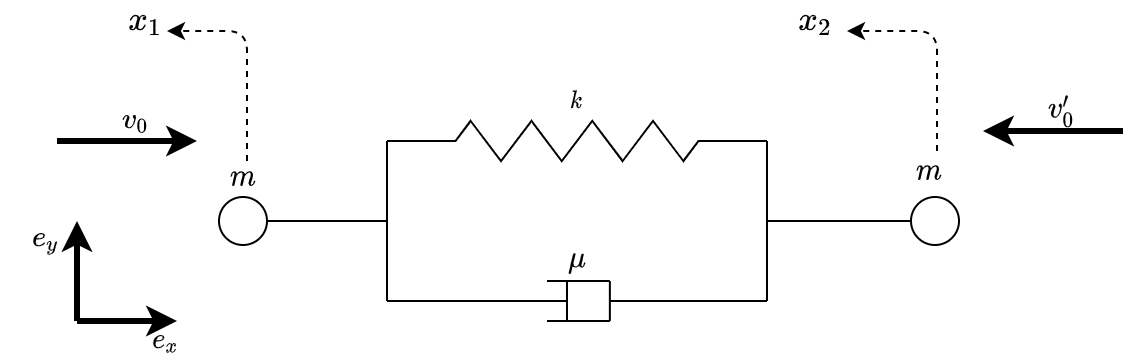

In [11]:
Image("../../reports/internship/Figures/Deplacement1D-Systeme.png", width = 700)

## Interactive plot

Observons un plot interactif dans lesquel on pourra faire varier les paramètres du modèle. Il faudra installer le package [Bokeh](https://bokeh.org/) pour que ca fonctionne.

In [12]:
from ipywidgets import interact

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [13]:
N = 1000
tmax = 5
t = np.linspace(0,tmax, N+1)
Y = np.zeros(shape=(N+1, 4))

p = figure(title="Plot des déplacements et vitesses", plot_height=300, plot_width=600, y_range=(-1,1),
           background_fill_color='#efefef')
x1 = p.line(t, Y[:,0], color="blue", line_width=1.5, alpha=0.8, legend_label='x₁')
x2 = p.line(t, Y[:,1], color="orange", line_width=1.5, alpha=0.8, legend_label='x₂')

x1dot = p.line(t, Y[:,2], color="green", line_width=1.5, alpha=0.8, legend_label='ẋ₁')
x2dot = p.line(t, Y[:,3], color="red", line_width=1.5, alpha=0.8, legend_label='ẋ₂')


# p.legend.visible = False
p.legend.label_text_font_style = "italic"

In [17]:
def update(m=1.0, k=18.0, mu=1.3, v0=0.8, v_0=0.8, tmax=5.0):
    E = np.array([[0,0,1.0, 0],
                  [0,0,0,1.0],
                  [-k/m, k/m, -mu/m, mu/m],
                  [k/m, -k/m, mu/m, -mu/m]])
    Y0 = np.array([0,0, v0, -v_0])
    #Y0 = np.array([v0, -v_0, 0, 0])
    t = np.linspace(0, tmax, N+1)
    
    def model(Y, t):
        return E @ Y
    Y = odeint(model, Y0, t)
    
    x1.data_source.data['y'] = Y[:,0]
    x2.data_source.data['y'] = Y[:,1]
    x1dot.data_source.data['y'] = Y[:,2]
    x2dot.data_source.data['y'] = Y[:,3]

    print("\nCondition de trigonalisation dans R: mu^2 > 2km ?", mu*mu > 2*k*m)
    print("\nY final:", Y[-1])
    
    push_notebook()

In [18]:
show(p, notebook_handle=True)

In [20]:
interact(update, m=(-0,10,0.1), k=(-0,30,0.1), mu=(-0,10,0.1),
         v0=(-5,5,0.1), v_0=(-5,5,0.1), tmax=(0,32,1));

interactive(children=(FloatSlider(value=1.0, description='m', max=10.0), FloatSlider(value=18.0, description='…

En somme, le dispositif visqueux permet de dissiper l'énergie du système et de le ralentir. Les variables les plus influentes sur la convergence du système sont les vitesses initiales $v_0$ et $v'_0$. En général, on observe que si $v_0 \neq v'_0$, le système diverge.